
# VARIÁVEIS CATEGÓRICAS E CORRELACAO


In [5]:
#### leitura dos pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#### instala pydataset
!pip install pydataset --quiet

In [7]:
from pydataset import data
df = data('Journals')

In [8]:
### documentacao dos dados
##### dataset de artigos academicos
data('Journals', show_doc=True)

Journals

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Economic Journals Dat Set

### Description

a cross-section from 2000

_number of observations_ : 180

_observation_ : goods

### Usage

    data(Journals)

### Format

A dataframe containing :

title

journal title

pub

publisher

society

scholarly society ?

libprice

library subscription price

pages

number of pages

charpp

characters per page

citestot

total number of citations

date1

year journal was founded

oclc

number of library subscriptions

field

field description

### Source

Professor Theodore Bergstrom of the Department of Economics at the University
of California, San Diego.

### References

Stock, James H. and Mark W. Watson (2003) _Introduction to Econometrics_,
Addison-Wesley Educational Publishers,
http://wps.aw.com/aw_stockwatsn_economtrcs_1, chapter 6.

### See Also

`Index.Source`, `Index.Economics`, `Index.Econometrics`, `Index.Observations`




Analise preliminar dos dados

In [10]:
df.head(10)

,title,pub,society,libprice,pages,charpp,citestot,date1,oclc,field
1,Asian-Pacific Economic Literature,Blackwell,no,123,440,3822,21,1986,14,General
2,South African Journal of Economic History,So Afr ec history assn,no,20,309,1782,22,1986,59,Ec History
3,Computational Economics,Kluwer,no,443,567,2924,22,1987,17,Specialized
4,MOCT-MOST Economic Policy in Transitional Economics,Kluwer,no,276,520,3234,22,1991,2,Area Studies
5,Journal of Socio-Economics,Elsevier,no,295,791,3024,24,1972,96,Interdisciplinary
6,Labour Economics,Elsevier,no,344,609,2967,24,1994,15,Labor
7,Environment and Development economics,Cambridge Univ Pres,no,90,602,3185,24,1995,14,Development
8,Review. of Radical Political Economics,Elsevier,no,242,665,2688,27,1968,202,Specialized
9,Economics of Planning,Kluwer,no,226,243,3010,28,1987,46,Area Studies
10,Metroeconomica,Blackwell,no,262,386,2501,30,1949,46,General


## Variáveis Numéricas

In [11]:
df.describe()

,libprice,pages,charpp,citestot,date1,oclc
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,417.722222,827.744444,3232.700000,647.055556,1966.905556,196.866667
std,385.834596,436.817402,819.358285,1182.373679,25.711484,204.528847
min,20.000000,167.000000,1782.000000,21.000000,1844.000000,2.000000
25%,134.500000,548.750000,2715.000000,97.750000,1962.750000,52.000000
50%,282.000000,693.000000,3010.000000,262.500000,1973.000000,122.500000
75%,540.750000,974.250000,3476.750000,656.000000,1982.250000,268.250000
max,2120.000000,2632.000000,6859.000000,8999.000000,1996.000000,1098.000000


In [12]:
### seleciona variaveis numericas
num_df = df.select_dtypes(include=['float64', 'int64'])
## calcula a matriz de correlação
corr = num_df.corr()

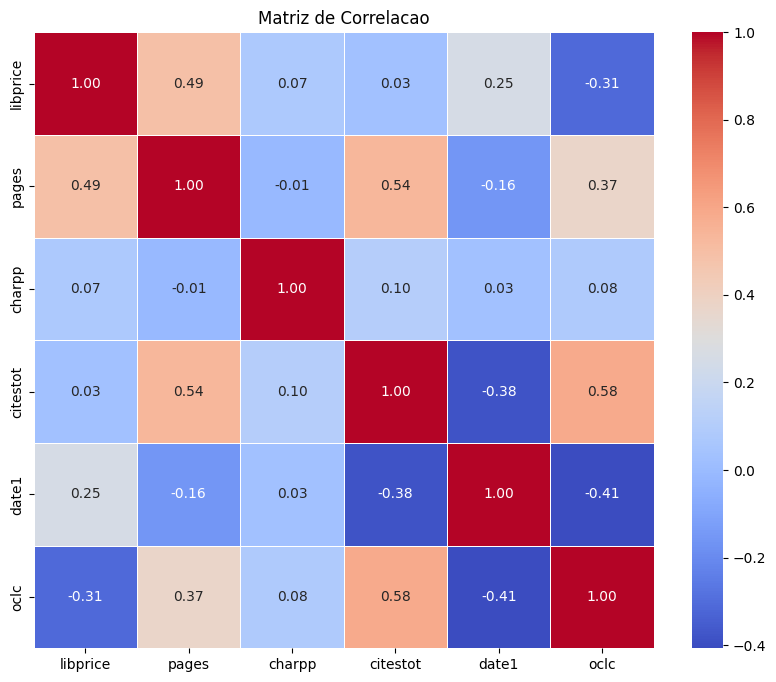

In [13]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

Correlacao elevada entre citestot (total de citacoes) e numero de subscricoes oclc e números de paginas do artigo

## Grafico de dispersao (PAIRPLOT) entre as numéricas

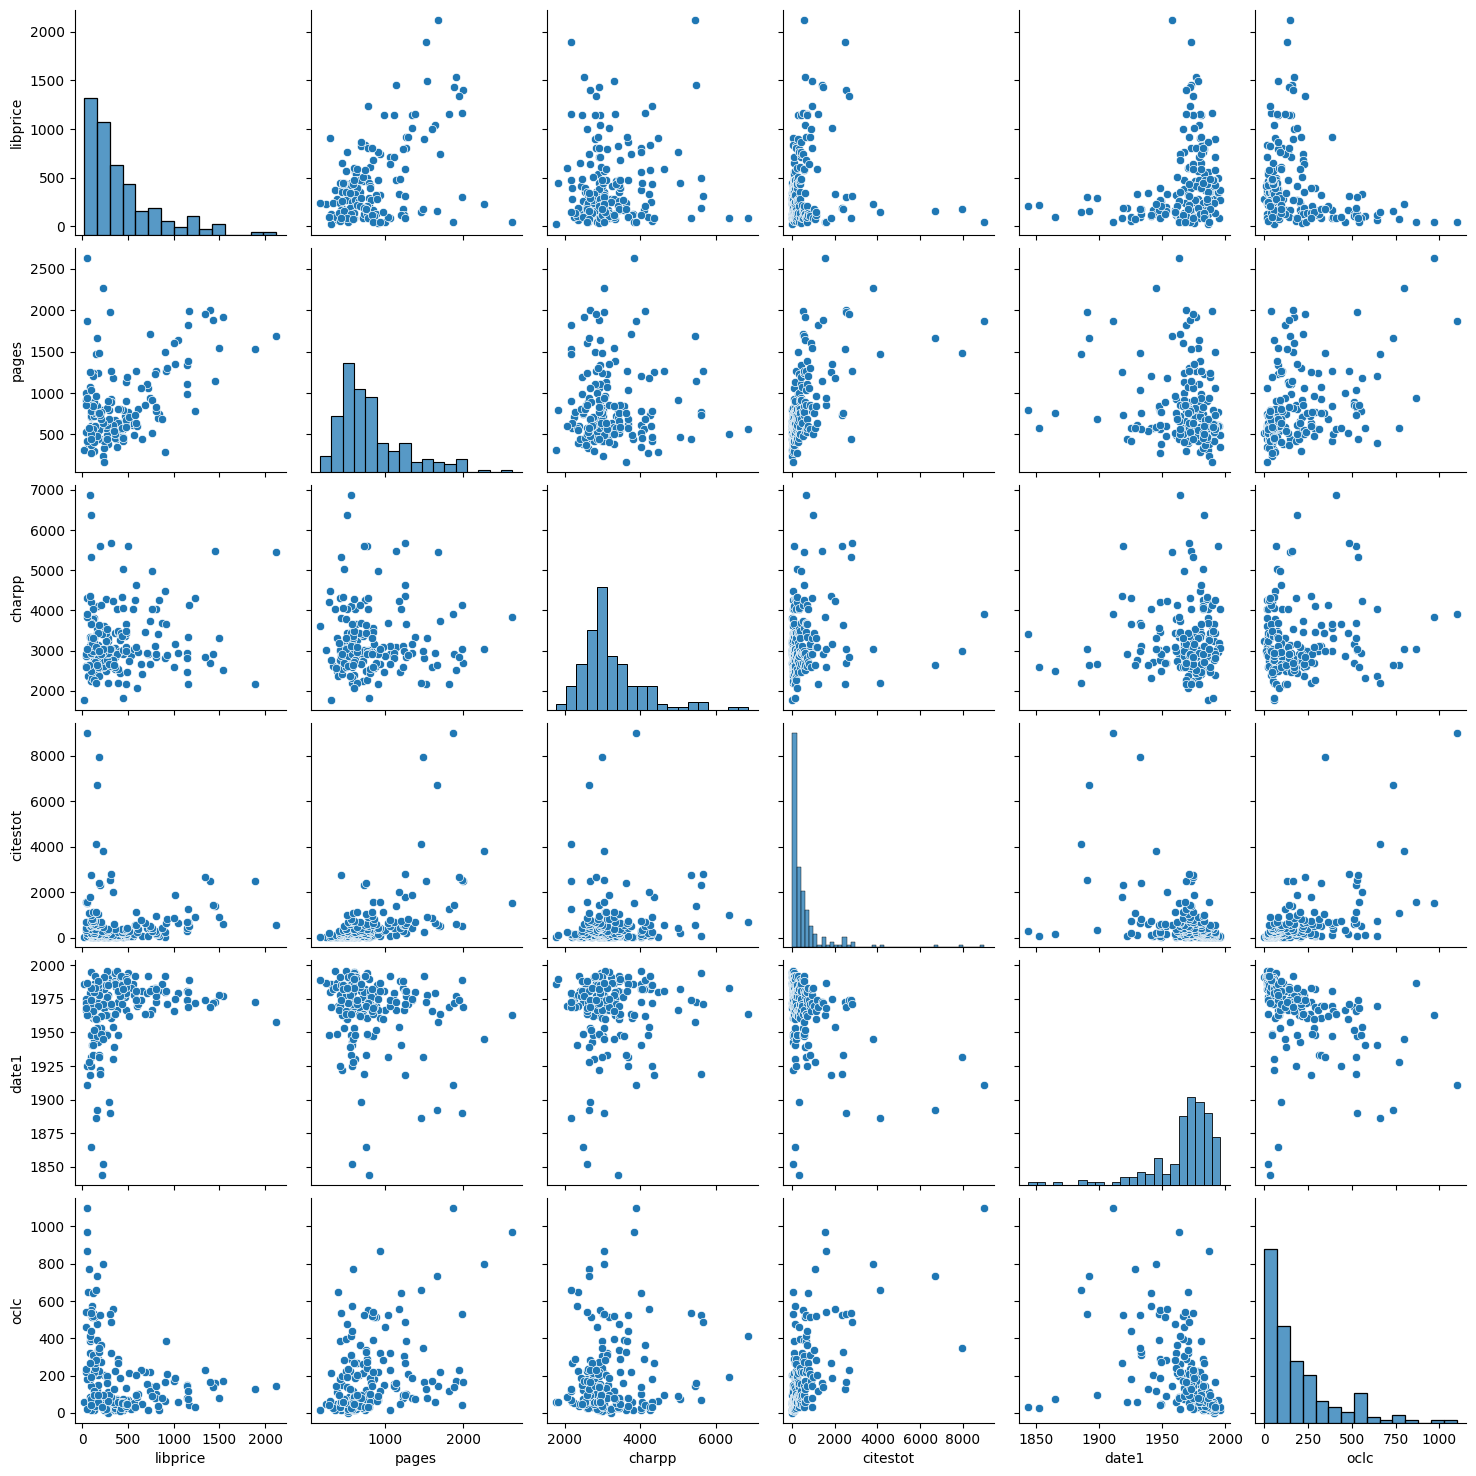

In [14]:
sns.pairplot(num_df, diag_kind='hist')

## Análise de variáveis categóricas

## Analise de correspondencia

In [15]:
df.head()

,title,pub,society,libprice,pages,charpp,citestot,date1,oclc,field
1,Asian-Pacific Economic Literature,Blackwell,no,123,440,3822,21,1986,14,General
2,South African Journal of Economic History,So Afr ec history assn,no,20,309,1782,22,1986,59,Ec History
3,Computational Economics,Kluwer,no,443,567,2924,22,1987,17,Specialized
4,MOCT-MOST Economic Policy in Transitional Economics,Kluwer,no,276,520,3234,22,1991,2,Area Studies
5,Journal of Socio-Economics,Elsevier,no,295,791,3024,24,1972,96,Interdisciplinary


temos categoricas : pub (publisher ), field (campo de estudo) e society : que indica se o artigo foi publicado por uma sociedade academica ou nao

In [16]:
#### verifica cardinalidade de editoras
df['pub'].nunique()

52

In [17]:
#### verifica cardinalidade de campos de atuacao
df['field'].nunique()

24

In [18]:
df["society"].nunique()

2

Como vimos que pub e field tem elevada cardinalidade, vamos recategorizar os dados nas top categorias

In [20]:
############### analisa variavel editora (pub)
contagens = df['pub'].value_counts()

# seleciona as top 5 categorias
top_categorias = contagens.head(5).index.tolist()

# muda o nome das cateogrias diferente das top para outras
df['pub'] = df['pub'].apply(lambda x: x if x in top_categorias else 'Outra')

In [21]:
df["pub"].value_counts()

pub
Outra             77
Elsevier          42
Blackwell         26
Kluwer            16
Springer          10
Academic Press     9
Name: count, dtype: int64

In [22]:
############### analisa variavel campo de atuacao
contagens = df['field'].value_counts()

# seleciona as top 5 categorias
top_categorias = contagens.head(5).index.tolist()

# muda o nome das cateogrias diferente das top para outras
df['field'] = df['field'].apply(lambda x: x if x in top_categorias else 'Outra')

In [23]:
df["field"].value_counts()

field
Outra             92
General           40
Specialized       14
Public Finance    12
Development       11
Finance           11
Name: count, dtype: int64

<ipython-input-24-e592d177921a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x="pub",palette=palette).set_title('Contagem de editoras')


Text(0.5, 1.0, 'Contagem de editoras')

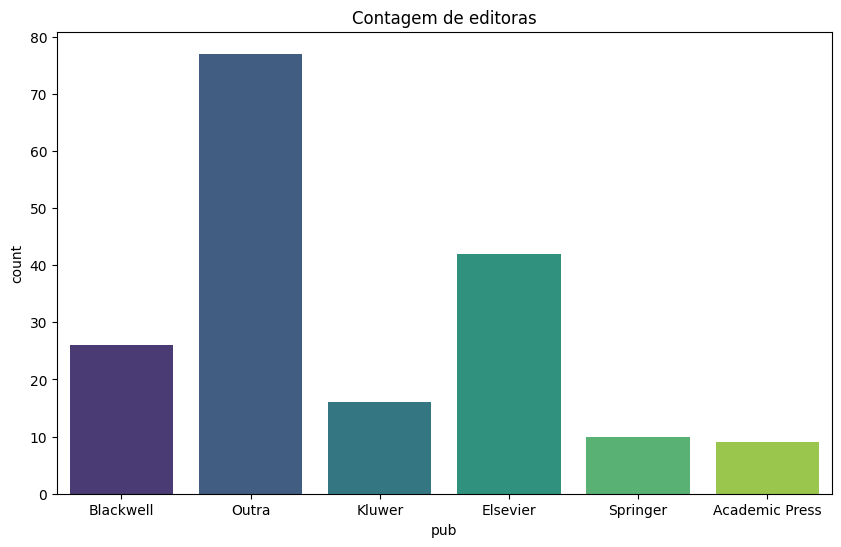

In [24]:
palette = sns.color_palette("viridis", len(df['pub'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(df, x="pub",palette=palette).set_title('Contagem de editoras')

<ipython-input-25-e5141fb27191>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x="field",palette=palette).set_title('Contagem de Áreas de Atuacao')


Text(0.5, 1.0, 'Contagem de Áreas de Atuacao')

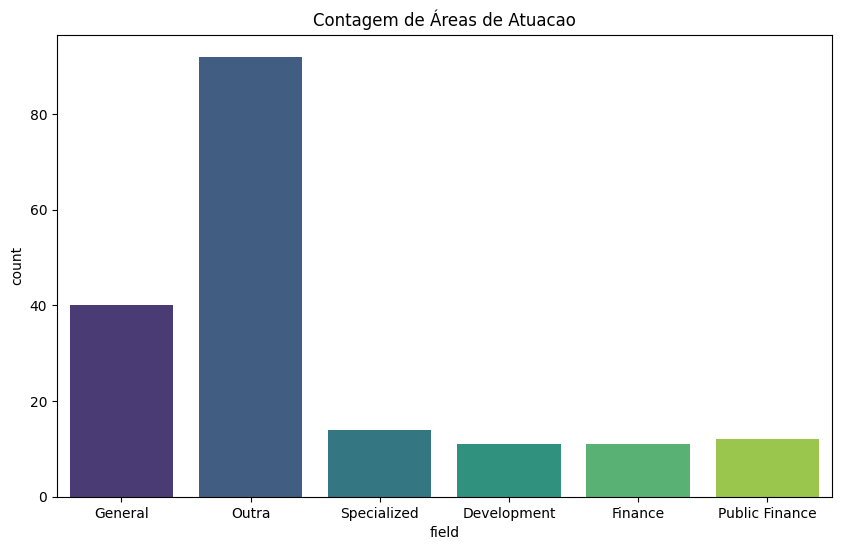

In [25]:
palette = sns.color_palette("viridis", len(df['field'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(df, x="field",palette=palette).set_title('Contagem de Áreas de Atuacao')

In [26]:
from scipy.stats import chi2_contingency

In [27]:
# Cria a tabela de contingencia
tabela_contingencia = pd.crosstab(df['pub'], df['field'])

print("Tabela de contingencia:")
print(tabela_contingencia)


Tabela de contingencia:
field           Development  Finance  General  Outra  Public Finance  Specialized
pub                                                                              
Academic Press            0        1        0      7               0            1
Blackwell                 4        0       14      6               1            1
Elsevier                  2        4        3     27               1            5
Kluwer                    0        0        2     12               1            1
Outra                     5        4       20     35               8            5
Springer                  0        2        1      5               1            1


In [28]:
# analisa as frequencias de linhas
perc_linha = tabela_contingencia.div(tabela_contingencia.sum(axis=1), axis=0) * 100

print("\Frequencias:")
print(perc_linha)

\Frequencias:
field           Development    Finance    General      Outra  Public Finance  Specialized
pub                                                                                      
Academic Press     0.000000  11.111111   0.000000  77.777778        0.000000    11.111111
Blackwell         15.384615   0.000000  53.846154  23.076923        3.846154     3.846154
Elsevier           4.761905   9.523810   7.142857  64.285714        2.380952    11.904762
Kluwer             0.000000   0.000000  12.500000  75.000000        6.250000     6.250000
Outra              6.493506   5.194805  25.974026  45.454545       10.389610     6.493506
Springer           0.000000  20.000000  10.000000  50.000000       10.000000    10.000000


In [29]:
### realiza o teste qui quadrado
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

In [30]:
chi2

47.40409816750161

In [31]:
p

0.004392265383396728

In [ ]:
### hipotese nula as variaveis nao se relacionam pode ser rejeitada pois p < 0.05. existe uma associacao entre a editora e a area.

## Interagindo numericas e categoricas

In [32]:
df.columns

Index(['title', 'pub', 'society', 'libprice', 'pages', 'charpp', 'citestot', 'date1', 'oclc',
       'field'],
      dtype='object')

Text(0.5, 1.0, 'Preco da Publicacao por editora')

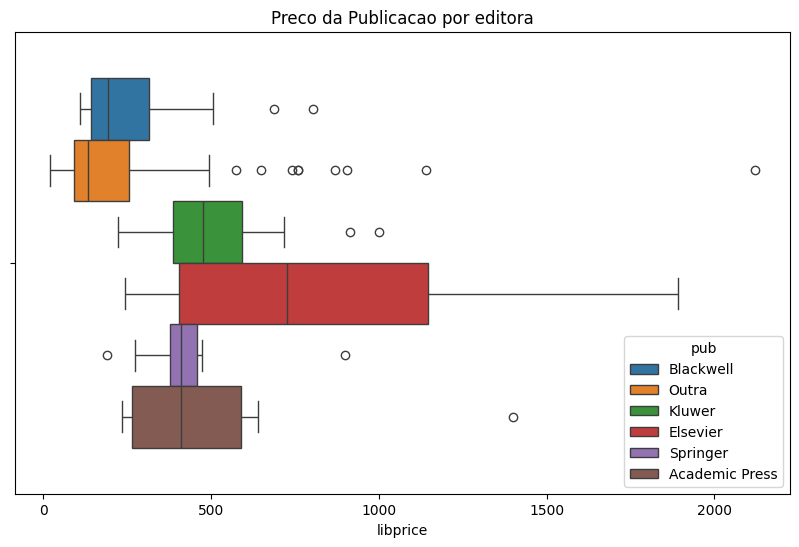

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(df, x="libprice", hue="pub").set_title('Preco da Publicacao por editora')

A editora elsevier tem um preco maior para os artigos academicos

Text(0.5, 1.0, 'Numero de citacoes por editora')

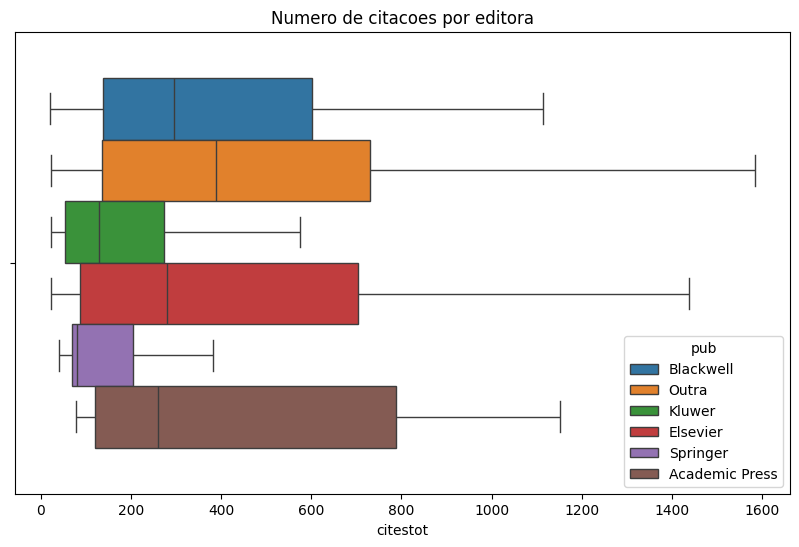

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(df, x="citestot", hue="pub", showfliers = False).set_title('Numero de citacoes por editora')

A editora elsevier e blackwell tem maiores medianas de numero de citacoes, mas a academic press tem uma maior massa de artigos concentrada de 300 a 800 citacoes

## Modelos de regressao e categóricas

- vamos prever o numero de citecoes
- nesse caso excluiremos o titulo pois nesse caso ele é so um indicador de id

In [37]:
#df.drop("title", axis = 1, inplace = True)

In [38]:
df.dtypes

pub         object
society     object
libprice     int64
pages        int64
charpp       int64
citestot     int64
date1        int64
oclc         int64
field       object
dtype: object

In [39]:
### utilizando o pacote pd get dummies
df_dummies = pd.get_dummies(df).astype(int)

In [41]:
df.head()

,pub,society,libprice,pages,charpp,citestot,date1,oclc,field
1,Blackwell,no,123,440,3822,21,1986,14,General
2,Outra,no,20,309,1782,22,1986,59,Outra
3,Kluwer,no,443,567,2924,22,1987,17,Specialized
4,Kluwer,no,276,520,3234,22,1991,2,Outra
5,Elsevier,no,295,791,3024,24,1972,96,Outra


In [40]:
df_dummies.head()

,libprice,pages,charpp,citestot,date1,oclc,pub_Academic Press,pub_Blackwell,pub_Elsevier,pub_Kluwer,pub_Outra,pub_Springer,society_no,society_yes,field_Development,field_Finance,field_General,field_Outra,field_Public Finance,field_Specialized
1,123,440,3822,21,1986,14,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,20,309,1782,22,1986,59,0,0,0,0,1,0,1,0,0,0,0,1,0,0
3,443,567,2924,22,1987,17,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,276,520,3234,22,1991,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0
5,295,791,3024,24,1972,96,0,0,1,0,0,0,1,0,0,0,0,1,0,0


Regressao simples

In [42]:
#### Roda o OLS

### importa o pacote
import statsmodels.api as sm

### define a variável explicativa e adiciona uma constante
X = sm.add_constant(df_dummies['pages'])


### define a variável de interesse

y = df_dummies['citestot']

In [43]:
# Fit do modelo
model = sm.OLS(y, X).fit()

In [44]:
## gera a tabela de regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               citestot   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     72.13
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           7.77e-15
Time:                        01:17:43   Log-Likelihood:                -1497.8
No. Observations:                 180   AIC:                             3000.
Df Residuals:                     178   BIC:                             3006.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -556.1284    160.085     -3.474      0.0

R quadrado baixo: relacao nao parece completamente linear / explicada

## Regressao multipla com eliminacao recursiva

In [45]:
##### define funcao para eliminacao recursiva das variaveis explicativas com base no p-valor
def OLS_RFE(X, y, threshold=0.05):
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > threshold:
            remove_feature = p_values.idxmax()
            X = X.drop(remove_feature, axis=1)
        else:
            break
    return model, X.columns

In [47]:
#### aplica a funcao e print da tabela de regressao
X = df_dummies.drop(["citestot","society_no"],axis =1)
y = df_dummies["citestot"]

final_model, selected_features = OLS_RFE(X, y)
print("Variáveis selecionadas:", selected_features)
print("Tabela de Regressao:")
print(final_model.summary())

Variáveis selecionadas: Index(['pages', 'date1', 'oclc', 'pub_Academic Press', 'pub_Blackwell', 'pub_Elsevier',
       'pub_Kluwer', 'pub_Outra', 'pub_Springer'],
      dtype='object')
Tabela de Regressao:
                            OLS Regression Results                            
Dep. Variable:               citestot   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     20.68
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.02e-21
Time:                        01:21:32   Log-Likelihood:                -1467.5
No. Observations:                 180   AIC:                             2953.
Df Residuals:                     171   BIC:                             2982.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
    

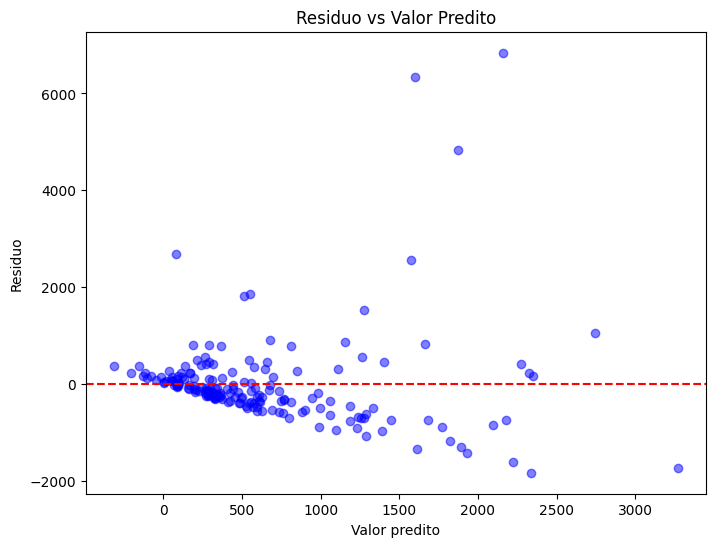

In [48]:
# salva o dado do resíduo
residuals = model.resid
# calcula ovalor predito
predicted_values = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='blue', alpha=0.5)

# adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

# titulos
plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()